## EfficientNet

In [10]:
#!c1.4
import os
import zipfile

import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from data_prepare.f1score import F1Score
from data_prepare.dataset_tools import extract_zip_with_cleanup, prepare_and_save_data
from data_prepare.plots import plot_history, confusion_matrix_plot, roc_plot, precision_recall_plot, CommonPlot
from data_prepare.models import ModelType, NetFineTunedModel, PersistModel, NetPureModel
from data_prepare.loaders import NetDataLoader

In [12]:
IMAGE_ARCHIVE_PATH="data/celeb/v1/"
IMAGE_TEST_V2_PATH="data/celeb/v2/test"
IMAGE_TEST_V1_PATH="data/celeb/v1/test"
MODELS_DIR = "models"
RESULTS_DIR = "results"
IMAGE_SIZE=(224,224)
MODEL_TYPE=ModelType.EFFICIENTNET
DATASET_OUTPUT_DIR='data/dataset'
LEARNING_RATE=1e-4
FEATURE_DIM=512
print('Done')

Done


In [4]:
data_loader = NetDataLoader(IMAGE_ARCHIVE_PATH)
train_gen, val_gen, test_gen = data_loader.load_genrators()
print("Done", train_gen, val_gen, test_gen)

data/celeb/v1/fake data/celeb/v1/real
data/dataset/net/train data/dataset/net/val data/dataset/net/test
Found 9073 images belonging to 2 classes.
Found 1944 images belonging to 2 classes.
Found 1946 images belonging to 2 classes.

Class indices: {'fake': 0, 'real': 1}
Train samples: 9073
Validation samples: 1944
Test samples: 1946
Done <keras.src.preprocessing.image.DirectoryIterator object at 0x7fe5ce9cfc10> <keras.src.preprocessing.image.DirectoryIterator object at 0x7fe5ce9ce050> <keras.src.preprocessing.image.DirectoryIterator object at 0x7fe5ce9cdd20>


## 1. Pure model

In [21]:
net_pure_model = PersistModel(NetPureModel(MODELS_DIR, RESULTS_DIR))

NetPure model run
Pure model run


In [6]:
_, pure_history = net_pure_model.fit(train_gen, val_gen, 5)

Persist fitting run
Pure fitting run
Epoch 1/5


2025-05-23 13:54:56.313256: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2025-05-23 13:54:59.340771: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8900
2025-05-23 13:55:06.162147: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fe488506e60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-05-23 13:55:06.162218: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2025-05-23 13:55:08.083554: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-05-23 13:55:11.703574: I ./tensorflow/compiler/jit/device_compiler.h:186] Comp

284/284 [==============================] - ETA: 0s - loss: 0.3556 - precision: 0.6126 - recall: 0.3143 - auc: 0.8076

/home/jupyter/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


284/284 [==============================] - 141s 316ms/step - loss: 0.3556 - precision: 0.6126 - recall: 0.3143 - auc: 0.8076 - val_loss: 0.7123 - val_precision: 0.7419 - val_recall: 0.2884 - val_auc: 0.7811
Epoch 2/5
284/284 [==============================] - ETA: 0s - loss: 0.2012 - precision: 0.7915 - recall: 0.6857 - auc: 0.9490

/home/jupyter/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


284/284 [==============================] - 79s 277ms/step - loss: 0.2012 - precision: 0.7915 - recall: 0.6857 - auc: 0.9490 - val_loss: 0.4908 - val_precision: 0.9485 - val_recall: 0.2884 - val_auc: 0.8817
Epoch 3/5
284/284 [==============================] - ETA: 0s - loss: 0.1402 - precision: 0.8589 - recall: 0.7931 - auc: 0.9749

/home/jupyter/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


284/284 [==============================] - 79s 277ms/step - loss: 0.1402 - precision: 0.8589 - recall: 0.7931 - auc: 0.9749 - val_loss: 0.1494 - val_precision: 0.9000 - val_recall: 0.7618 - val_auc: 0.9747
Epoch 4/5
284/284 [==============================] - 76s 269ms/step - loss: 0.0966 - precision: 0.8955 - recall: 0.8637 - auc: 0.9888 - val_loss: 0.1607 - val_precision: 0.8696 - val_recall: 0.8150 - val_auc: 0.9719
Epoch 5/5
284/284 [==============================] - 76s 267ms/step - loss: 0.0773 - precision: 0.9187 - recall: 0.9033 - auc: 0.9921 - val_loss: 0.2427 - val_precision: 0.8789 - val_recall: 0.7053 - val_auc: 0.9444


In [23]:
net_pure_model._model.load_trained_model()

In [24]:
y_pred = net_pure_model.predict(test_gen)

61/61 [==============================] - 13s 196ms/step


#### Analyze result

results/netpure/y_pred.csv
results/netpure/history.csv


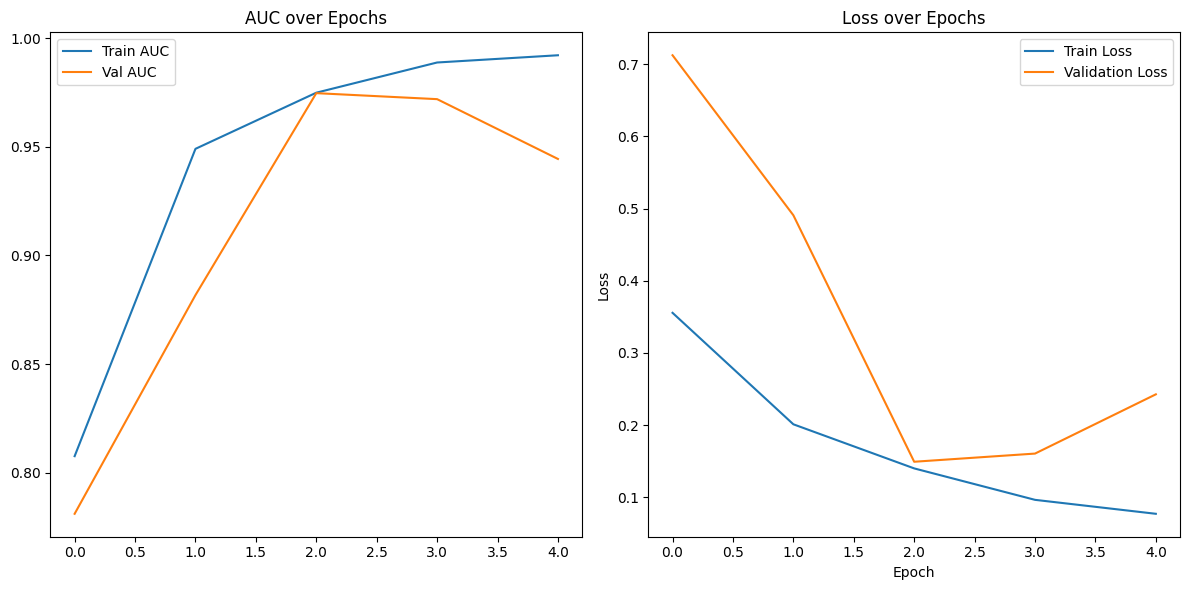

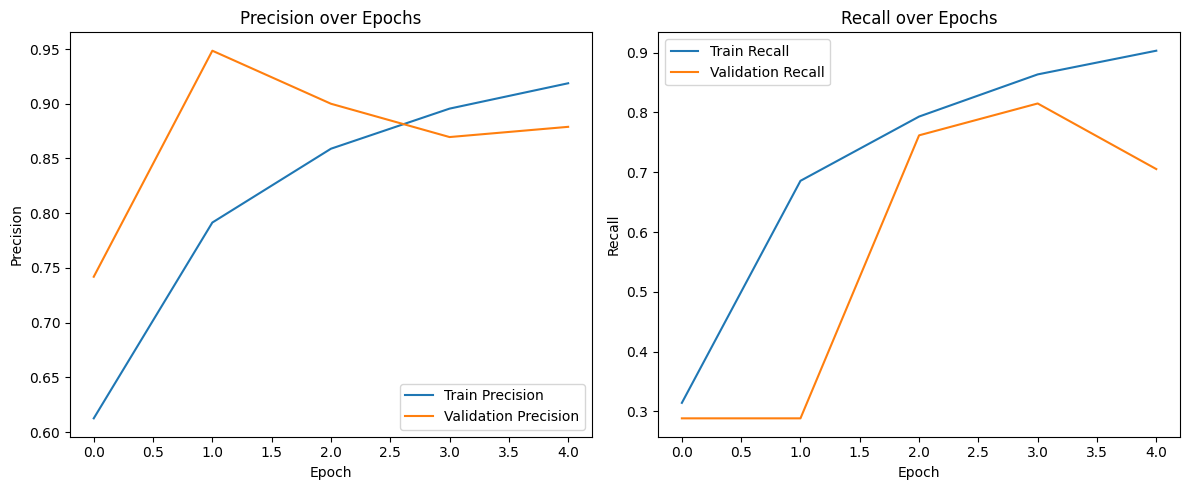

<Figure size 640x480 with 0 Axes>

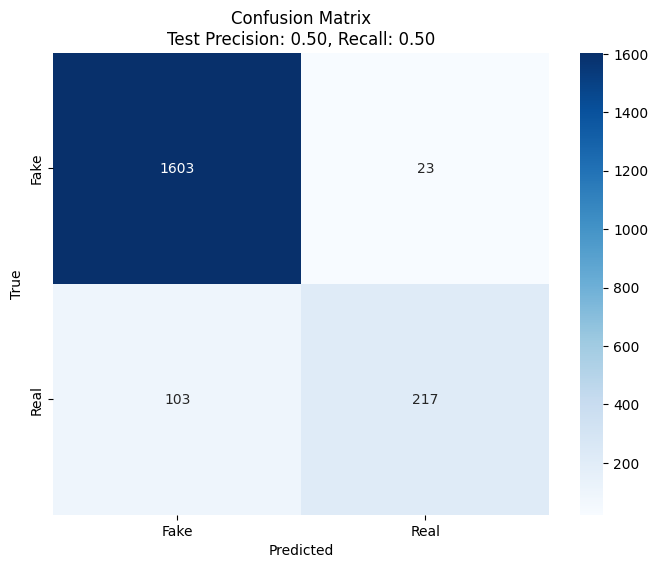

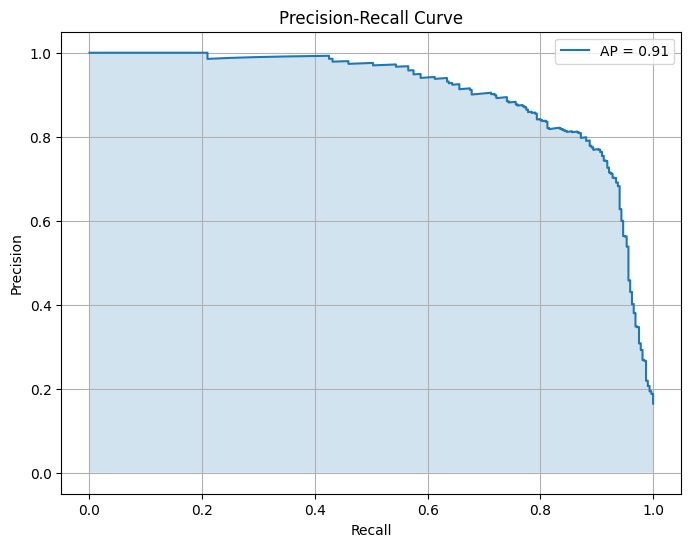

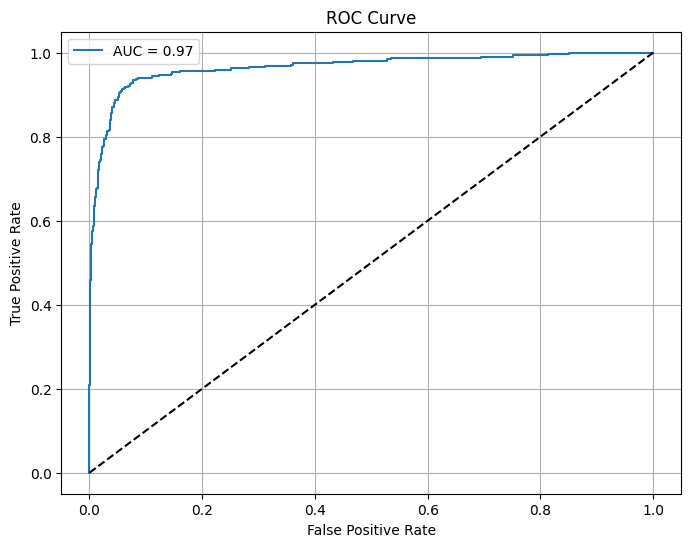

In [25]:
plots = CommonPlot(net_pure_model)
y, y_ = plots.plot(test_gen)

## 2. Finetune model

### Подготовка данных

In [12]:
data_loader = NetDataLoader(IMAGE_ARCHIVE_PATH)
train_gen, val_gen, test_gen = data_loader.load_genrators(DATASET_OUTPUT_DIR)
print("Done")

data/celeb/v1/fake data/celeb/v1/real
data/dataset/net/train data/dataset/net/val data/dataset/net/test
Found 5663 images belonging to 2 classes.
Found 1213 images belonging to 2 classes.
Found 1215 images belonging to 2 classes.

Class indices: {'fake': 0, 'real': 1}
Train samples: 5663
Validation samples: 1213
Test samples: 1215
Done


In [5]:
finetune = NetFineTunedModel(MODELS_DIR)
finetune_model, finetune_history = finetune.fit(train_gen, val_gen, 3, 7)

Epoch 1/3


/Users/aleksandr/opt/anaconda3/envs/deepfakedetection/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 848ms/step - auc: 0.5730 - loss: 1.0176 - precision: 0.1170 - recall: 0.7960

4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 5s/step - auc: 0.5852 - loss: 0.9727 - precision: 0.1222 - recall: 0.7641 - val_auc: 0.5474 - val_loss: 0.5362 - val_precision: 0.2857 - val_recall: 0.0564
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - auc: 0.8731 - loss: 0.3577 - precision: 0.4333 - recall: 0.8101 - val_auc: 0.5175 - val_loss: 0.5016 - val_precision: 0.1622 - val_recall: 0.0188
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - auc: 0.9619 - loss: 0.2698 - precision: 0.6417 - recall: 0.8087 - val_auc: 0.4956 - val_loss: 0.4810 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - auc: 0.8740 - loss: 0.2534 - precision: 0.6661 - recall: 0.7999

4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - auc: 0.8772 - loss: 0.2538 - precision: 0.6395 - recall: 0.7854 - val_auc: 0.4943 - val_loss: 0.4810 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - auc: 0.9220 - loss: 0.2646 - precision: 0.6196 - recall: 0.7568

4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - auc: 0.9221 - loss: 0.2564 - precision: 0.6188 - recall: 0.7509 - val_auc: 0.4961 - val_loss: 0.4808 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - auc: 0.9404 - loss: 0.2144 - precision: 0.6528 - recall: 0.4347

4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - auc: 0.9324 - loss: 0.2206 - precision: 0.6111 - recall: 0.4205 - val_auc: 0.4975 - val_loss: 0.4807 - val_precision: 0.1250 - val_recall: 0.0063
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - auc: 0.9575 - loss: 0.1930 - precision: 0.5919 - recall: 0.6066

4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - auc: 0.9562 - loss: 0.1931 - precision: 0.5826 - recall: 0.5944 - val_auc: 0.5003 - val_loss: 0.4807 - val_precision: 0.1000 - val_recall: 0.0063
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - auc: 0.9299 - loss: 0.2009 - precision: 0.6493 - recall: 0.5627

4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - auc: 0.9232 - loss: 0.2057 - precision: 0.6306 - recall: 0.5411 - val_auc: 0.5026 - val_loss: 0.4807 - val_precision: 0.0870 - val_recall: 0.0063
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - auc: 0.9445 - loss: 0.2295 - precision: 0.5154 - recall: 0.4657

KeyboardInterrupt: 

In [29]:
finetune_history_df = pd.DataFrame(finetune_histories.history)
history_df.to_csv(RESULTS_DIR + '/finetune_training_history.csv', index=False)

NameError: name 'pd' is not defined

In [ ]:
# efficientnet_model_dir = os.path.join(MODELS_DIR, 'efficientnet_finetune_deepfake_model.h5')
# finetune_model.save(efficientnet_model_dir)

In [4]:
finetune = NetFineTunedModel(MODELS_DIR)

In [6]:
finetune.load_trained_model()

TypeError: Error when deserializing class 'DepthwiseConv2D' using config={'name': 'block1a_dwconv', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_out', 'distribution': 'truncated_normal', 'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}.

Exception encountered: Unrecognized keyword arguments passed to DepthwiseConv2D: {'groups': 1}

In [13]:
y_pred = finetune_model.predict(test_gen)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.to_csv(RESULTS_DIR + '/y_pred.csv', index=False)

NameError: name 'finetune_trained_model' is not defined

### Analyze results for finetuned model

In [14]:
y_pred = pd.read_csv('results/net/y_pred.csv')
y_true = test_gen.labels

In [15]:
finetune_loaded_history_df = pd.read_csv('results/finetune_training_history.csv')
finetune_loaded_history = {'history': finetune_loaded_history_df.to_dict()}

In [16]:
confusion_matrix_plot(y_pred, y_true, 0.5, 0.5)

ValueError: Found input variables with inconsistent numbers of samples: [1215, 1946]

## 3. Pure model with V2 dataset

In [7]:
net_pure_model = NetPureModel(MODELS_DIR, RESULTS_DIR)

NetPure model run
Pure model run


In [8]:
net_pure_model.load_trained_model()

In [13]:
test_datagen = ImageDataGenerator(
            preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
        )
v2_test_gen = test_datagen.flow_from_directory(
            IMAGE_TEST_V2_PATH,
            target_size=IMAGE_SIZE,
            batch_size=32,
            class_mode='binary',
            shuffle=True,
            seed=42
        )
print("\nClass indices:", v2_test_gen.class_indices)
print(f"Test samples: {v2_test_gen.samples}")
        

Found 6866 images belonging to 2 classes.

Class indices: {'0': 0, '1': 1}
Test samples: 6866


In [15]:
y_pred = net_pure_model.predict(v2_test_gen)

215/215 [==============================] - 30s 134ms/step


In [16]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.to_csv(f'{RESULTS_DIR}/netpure/y_test_pred.csv', index=False)

In [18]:
test_loss, test_precision, test_recall, test_auc = net_pure_model.evaluate(v2_test_gen)

215/215 [==============================] - 23s 100ms/step - loss: 0.5219 - precision: 0.9170 - recall: 0.5956 - auc: 0.8965


In [19]:
test_loss, test_precision, test_recall, test_auc

(0.5218847990036011,
 0.9170361161231995,
 0.5956396460533142,
 0.8964735865592957)